<a href="https://colab.research.google.com/github/JoaquinV13/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Practica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 4
Hecho por: Joaquin Vilaplana Lopez y Adrián García-Arroba Romero

Se procede a a descargar las librerías.

In [1]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.1 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

In [3]:
!pip install numpy

In [4]:
!pip install scipy

In [5]:
!pip install scoop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78113 sha256=9cc36ca386a0fc440aaf7997f28a2b1d064a24d0eff08148f69c8987b46666f3
  Stored in directory: /root/.cache/pip/wheels/26/c6/da/088e4bffcfbc33fa40644ca636267bc801c8fd9eef973483db
Successfully built scoop


1.- Encontrar los máximos de la función "picos"

$$z = f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

En el dominio $$\{x,y\} \in [-100,100]$$


Compara el funcionamiento del Algoritmo Genético para cruce con un punto con cruce con dos puntos.

Se grafica la función para ver que forma tiene y determinar dónde se podría encontrar el máximo global de la función.

Se va a representar una gráfica en 3D de la superficie creada por la función matemática llamada funcion_prueba. Se define un espacio tridimensional mediante vectores x e y que abarcan un rango de valores, y se evalúa la función en cada par de coordenadas, generando así una matriz de valores. Luego, se utiliza plot_surface para trazar la superficie tridimensional en función de estas coordenadas y valores. El gráfico resultante proporciona una visualización intuitiva de la forma de la función en el espacio tridimensional, con ejes etiquetados para representar las variables x e y y el valor de la función f(x, y).

Text(0.5, 0, 'f(x,y)')

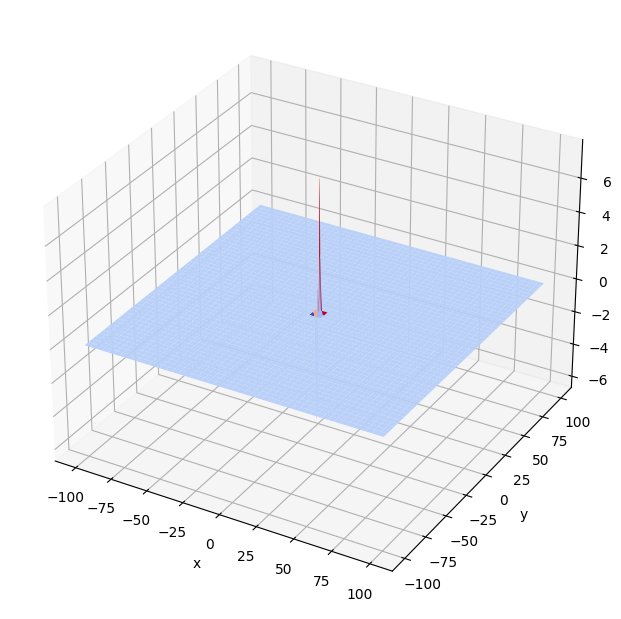

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms


# Evaluamos todos los valores de las variables
# Definimos la función objetivo

# Generamos vectores que barran todo el dominio
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)


def funcion_prueba(x):
    # x es x[0] e y es x[1]
    p1 = (3*(1-x[0])**2)*np.exp(-x[0]**2-(x[1]+1)**2)
    p2 = 10*(x[0]/5-x[0]**3-x[1]**5)*np.exp(-x[0]**2-x[1]**2)
    p3 = 1/3*np.exp(-(x[0]+1)**2-x[1]**2)
    res = p1-p2-p3
    return res

x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
# ax = figure_3d.gca(projection="3d")
ax = figure_3d.add_axes(Axes3D(figure_3d))
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

Esta parte de código "np.linspace(-100, 100, 1000)" grafica 1000 puntos en un eje separados de manera equidistante. El problema es que la función no se puede apreciar muy bien con estos ejes, es por eso que se aumentan las coordenadas de [-100,100] a [-5,5].

Text(0.5, 0, 'f(x,y)')

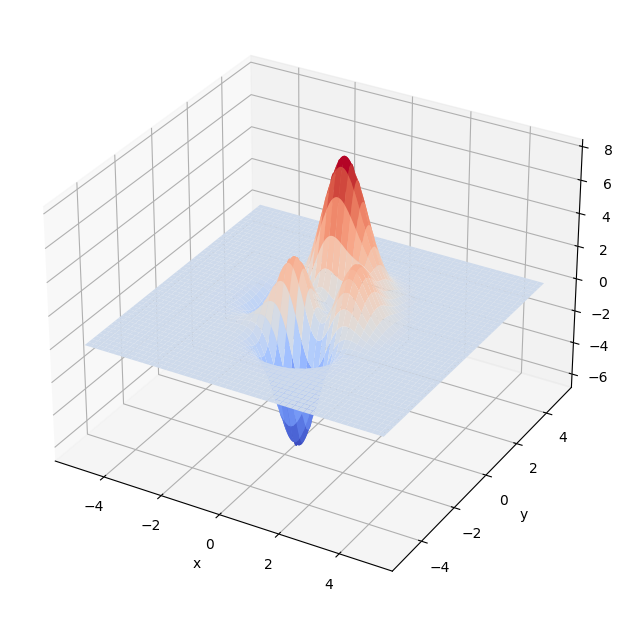

In [7]:


# Evaluamos todos los valores de las variables
# Definimos la función objetivo

# Generamos vectores que barran todo el dominio
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)


def funcion_prueba(x):
    # x es x[0] e y es x[1]
    p1 = (3*(1-x[0])**2)*np.exp(-x[0]**2-(x[1]+1)**2)
    p2 = 10*(x[0]/5-x[0]**3-x[1]**5)*np.exp(-x[0]**2-x[1]**2)
    p3 = 1/3*np.exp(-(x[0]+1)**2-x[1]**2)
    res = p1-p2-p3
    return res

x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
# ax = figure_3d.gca(projection="3d")
ax = figure_3d.add_axes(Axes3D(figure_3d))
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

Gracias a la gráfica podemos observar más o menos donde se econtrarían los máximos de la función dada. Con ello podríamos comprobar si los resultados del modelo son correctos, próximos a los resultados reales o no.

#Único punto de cruce

Se procede a crear un algoritmo genético. La población incial es 200 individuos ya que el sistema trabaja en formato float de 64 bits, por tanto, se necesitan 64 bits para representar cada valor de la coordenada,y son dos coordenadas la la X y la Y, esos números entonces como máximo para que haya buena variabilidad genética y el modelo pueda converger, la población debe ser de mínimo 128 individuos que pueden tener valores del -4 al 4 y como máximo 256.

Cada individuo en la población se representa como una lista de dos variables, y el algoritmo evolutivo utiliza un único punto de cruce (cxOnePoint) para combinar la información genética de dos padres y generar descendencia. El espacio de búsqueda de variables está limitado, y se emplea la función de evaluación para determinar la calidad de cada individuo. El proceso de evolución se realiza a lo largo de un número especificado de generaciones, incorporando operadores de mutación gaussiana y selección por torneo. Al final del proceso, se presenta el mejor individuo encontrado y se genera un gráfico que muestra la evolución del fitness a lo largo de las generaciones.

gen	nevals	avg     	std    	min     	max    
0  	200   	0.183125	1.39693	-4.99949	6.94301
1  	153   	0.73345 	2.15143	-6.53089	7.87778
2  	151   	2.15523 	2.77518	-6.48054	7.87778
3  	153   	4.11854 	2.62233	-1      	7.87778
4  	152   	6.09657 	1.80453	-1      	8.01389
5  	163   	6.61147 	2.16973	-3.20177	8.01389
6  	159   	7.08079 	1.93029	-1      	8.01389
7  	163   	7.30563 	1.95397	-5.26255	8.01389
8  	164   	7.26197 	2.23356	-2.72842	8.01389
9  	151   	7.66772 	1.50149	-1      	8.01389
10 	159   	7.59035 	1.73813	-1      	8.01389
11 	158   	7.59156 	1.86468	-4.62147	8.01389
12 	154   	7.65982 	1.67431	-3.43061	8.01389
13 	153   	7.52354 	1.96011	-1      	8.01389
14 	155   	7.57409 	1.84669	-1      	8.01389
15 	162   	7.54309 	1.89392	-1      	8.01389
16 	147   	7.79254 	1.37731	-1      	8.01389
17 	153   	7.52746 	1.94519	-1      	8.01389
18 	171   	7.61256 	1.76645	-1      	8.01389
19 	162   	7.50798 	2.00111	-4.66497	8.01389
20 	162   	7.6826  	1.76148	-4.37242	8.01389
21 	156   

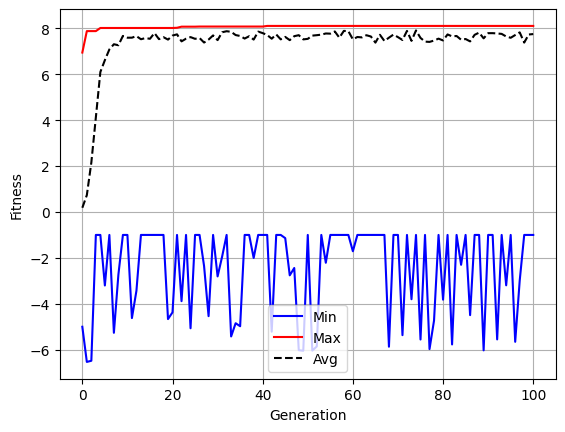

In [8]:


# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 4 or x[i] < -4:
            return -1,
        p1 = (3*(1-x[0])**2)*np.exp(-x[0]**2-(x[1]+1)**2)
        p2 = 10*(x[0]/5-x[0]**3-x[1]**5)*np.exp(-x[0]**2-x[1]**2)
        p3 = 1/3*np.exp(-(x[0]+1)**2-x[1]**2)
        res = p1-p2-p3
    return res,

toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -4, 4)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)

toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual,200)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.7, 0.3, 100 # número de generaciones 100.
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook


best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

La evolución del fitness en las generaciones es estable.

El mejor fitness alcanzado es 8.103491, y el mejor individuo es representado por el vector [-0.005979634419500654, 1.568691618416271].

La convergencia hacia una solución óptima es gradual.

#Dos puntos de cruce

El bucle principal con dos puntos de cruce (cxTwoPoint) en el algoritmo genético realiza la evolución de la población a lo largo de múltiples generaciones. En cada iteración del bucle, se seleccionan parejas de individuos de la población actual utilizando el operador de selección de torneo (selTournament). Luego, con una probabilidad especificada (CXPB), se aplica el operador de cruce de dos puntos (cxTwoPoint) a las parejas seleccionadas, generando descendencia que reemplaza a los padres en la población. Además, con otra probabilidad especificada (MUTPB), se realiza una operación de mutación gaussiana (mutGaussian) en algunos individuos de la población para introducir variabilidad. Este proceso se repite durante un número predeterminado de generaciones (NGEN), y al final del bucle, se obtiene la mejor solución encontrada y se presenta la evolución del mejor individuo en términos de fitness a lo largo de las generaciones mediante la función plot_evolucion. En este contexto, el cruce de dos puntos implica intercambiar segmentos de información genética entre dos individuos, permitiendo la combinación de características de ambos en la descendencia.

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	std    	min     	max    
0  	200   	0.183125	1.39693	-4.99949	6.94301
1  	145   	0.638907	2.04204	-6.53089	7.87778
2  	151   	1.76119 	2.39554	-5.31368	7.87778
3  	162   	3.20325 	2.47981	-1      	7.87778
4  	163   	4.85866 	2.36463	-1      	8.05022
5  	145   	6.30458 	1.75824	-1      	8.05022
6  	168   	7.08189 	1.75128	-1      	8.05022
7  	152   	7.34376 	2.0068 	-4.94619	8.05022
8  	159   	7.39813 	2.14716	-3.90642	8.05022
9  	169   	7.61848 	1.79538	-1      	8.05022
10 	155   	7.63879 	1.81379	-1.02598	8.05022
11 	164   	7.63553 	1.75804	-1      	8.05022
12 	157   	7.73946 	1.61192	-1      	8.05022
13 	152   	7.55944 	1.96191	-1      	8.05022
14 	165   	7.58045 	1.9497 	-1      	8.05022
15 	161   	7.73478 	1.52431	-1      	8.05022
16 	149   	7.85362 	1.20179	-1      	8.08873
17 	158   	7.5209  	2.0394 	-1      	8.08873
18 	159   	7.66957 	1.76484	-1      	8.08873
19 	160   	7.64317 	1.79648	-1      	8.08873
20 	152   	7.44615 	2.17914	-1      	8.08873
21 	159   

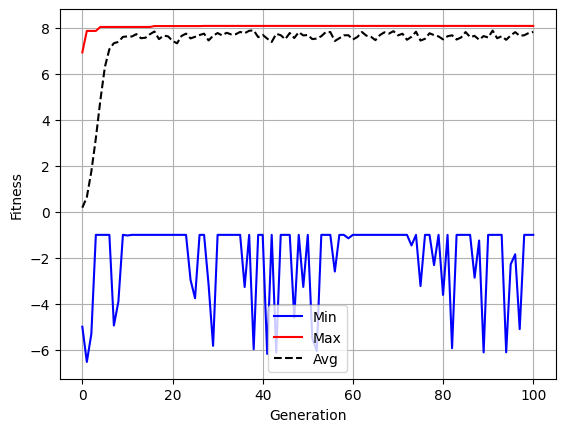

In [9]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 4 or x[i] < -4:
            return -1,
        p1 = (3*(1-x[0])**2)*np.exp(-x[0]**2-(x[1]+1)**2)
        p2 = 10*(x[0]/5-x[0]**3-x[1]**5)*np.exp(-x[0]**2-x[1]**2)
        p3 = 1/3*np.exp(-(x[0]+1)**2-x[1]**2)
        res = p1-p2-p3
    return res,

toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -4, 4)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 200)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.7, 0.3, 100 # número de generaciones 100.
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook


best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

La evolución del fitness en las generaciones es estable, pero con algunas fluctuaciones notables.

El mejor fitness alcanzado es 8.09507, y el mejor individuo es representado por un vector específico.

La convergencia es evidente, pero las fluctuaciones sugieren una exploración más diversa del espacio de búsqueda.

#Exploración y explotación
**Exploración:**

Objetivo: Descubrir nuevas regiones del espacio de búsqueda.

Enfoque: Se busca la diversidad y se exploran diferentes partes del espacio de búsqueda.

Aplicación: Puede ayudar a encontrar soluciones potencialmente mejores que las ya conocidas.

Estrategias implementadas:
Mayor probabilidad de mutación (exploración local) o selección de padres diversa.

La exploración se refiere a la capacidad del algoritmo para buscar soluciones en un amplio espacio de búsqueda.
En el caso del cruce de dos puntos, las fluctuaciones en el fitness indican una mayor exploración, ya que la población está probando diferentes soluciones antes de converger.
Se observa que la diversidad en las soluciones se mantiene a lo largo de las generaciones, lo que sugiere que el cruce de dos puntos contribuye a una exploración más extensa.

**Explotación:**

Objetivo: Examinar las regiones conocidas para encontrar soluciones más precisas.

Enfoque: Se centra en las áreas que ya han demostrado ser prometedoras.

Aplicación: Puede mejorar soluciones conocidas y converger hacia óptimos locales.

Estrategias implementadas:
Mayor probabilidad de cruce (explotación local) o selección de padres basada en su rendimiento.

La explotación implica la capacidad del algoritmo para concentrarse en regiones prometedoras del espacio de búsqueda para mejorar las soluciones.
En el caso del cruce de un punto, la convergencia gradual indica un enfoque más enfocado en la mejora continua de soluciones específicas.
Se observa una tendencia a converger hacia un óptimo local de manera más directa, lo que refleja un proceso de explotación más pronunciado.


2.- Dada la [Función de Rastringin](https://en.wikipedia.org/wiki/Rastrigin_function#:~:text=In%20mathematical%20optimization%2C%20the%20Rastrigin,has%20been%20generalized%20by%20Rudolph.), con A = 10 y  $$\{xi\} \in [-5.12,5.12]$$

Implementa dicha función en Python y minimízala para n=10

Compara el funcionamiento del Algoritmo Genético para cruce con un punto con cruce con dos puntos.

#Único punto de cruce

Se realiza un algoritmo genético para encontra el mínimo de la función anterior. La población inicial es de 640 individuos como mínimo ya que se necesitan 64 bits, que es lo que usa el sistema, para poder representar los valores de [-5.12 , 5.12] y como son 10 coordenadas pues serían 640 bits para la representación como mínimo de la población, por tanto, como máximo la población es de 1280 individuos. Se usarán 1000 individuos.

gen	nevals	avg    	std    	min    	max   
0  	1000  	184.174	32.8634	85.6838	304.52
1  	870   	190.117	87.7631	69.1841	400   
2  	891   	175.048	92.1034	66.4839	400   
3  	905   	153.776	89.0289	61.126 	400   
4  	881   	139.782	93.473 	51.7631	400   
5  	888   	131.421	100.949	49.0142	400   
6  	894   	116.22 	97.3944	35.583 	400   
7  	856   	105.357	97.7483	27.08  	400   
8  	900   	100.365	104.272	25.4431	400   
9  	875   	97.7762	112.975	18.5479	400   
10 	865   	95.3639	119.476	18.5479	400   
11 	881   	81.6949	111.964	16.7276	400   
12 	883   	72.5763	107.391	14.5091	400   
13 	863   	70.1701	111.673	13.5793	400   
14 	904   	76.9433	124.774	7.62791	400   
15 	901   	63.4936	112.102	10.4497	400   
16 	890   	55.4457	105    	9.12365	400   
17 	894   	61.541 	118.786	7.18732	400   
18 	874   	63.592 	124.092	6.9902 	400   
19 	885   	62.784 	126.103	5.12341	400   
20 	881   	58.4685	122.381	5.12341	400   
21 	879   	59.0214	125.131	5.12341	400   
22 	875   	55.6241	122.077	4.78846

Mejor fitness: 0.095011
Mejor individuo [0.0071660408301257306, -0.0059040863848495925, -0.006842570104053564, -0.012837329796404895, -0.009353433469232675, -0.0014500545250095698, 0.003900144589954673, 0.006060805284053644, 0.00611918712426281, -0.0014980226185711898]


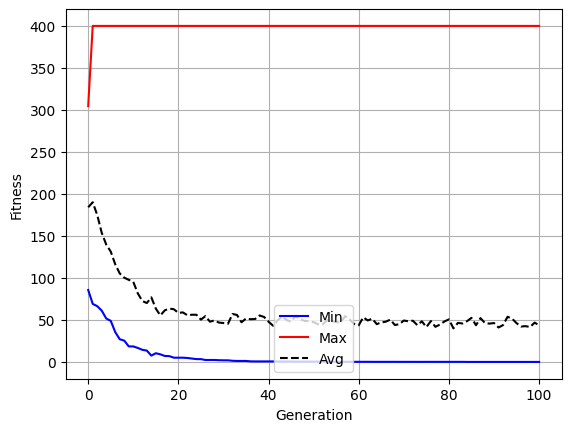

In [10]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

n = 10 # Número de individuos.

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """

    for i in range(len(x)):
     n = len(x)
     if x[i] >  5.12 or x[i] < -5.12:
      return 400,
    n = 10
    A = 10


    C = np.array(x)**2
    D = [0]*len(x)

    for i in range(len(x)):

      D[i] = A*(math.cos(2 * math.pi * np.array(x[i])))


    res = float(A*n + sum(C) - sum(D))

    return res,


toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, n)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 1000)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.8, 0.4, 100 # número de generaciones 100.

    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook


best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

El algoritmo genético utilizando el operador de cruce de un punto converge hacia un valor de aptitud (fitness) de aproximadamente 0.095011 después de 100 generaciones.

La evolución del fitness muestra una disminución constante, lo que indica que el algoritmo está mejorando la calidad de las soluciones a lo largo de las generaciones.

El mejor individuo encontrado tiene un conjunto de variables que produce un valor de función objetivo cercano a cero, lo cual es consistente con el objetivo de minimizar la función.

#Dos puntos de cruce

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg    	std    	min    	max   
0  	1000  	184.174	32.8634	85.6838	304.52
1  	872   	184.706	82.0256	69.1841	400   
2  	891   	171.957	92.0552	62.9818	400   
3  	861   	153.79 	92.0014	59.231 	400   
4  	883   	138.553	93.2324	47.2821	400   
5  	896   	128.298	99.3194	39.8135	400   
6  	897   	118.143	103.861	32.0718	400   
7  	866   	110.149	108.055	28.0208	400   
8  	897   	100.817	108.708	28.3487	400   
9  	886   	94.903 	111.887	16.0759	400   
10 	915   	90.2335	116.234	16.0759	400   
11 	874   	74.3753	105.549	15.8644	400   
12 	889   	75.5391	114.718	9.03043	400   
13 	902   	77.9827	123.952	10.3693	400   
14 	881   	70.3684	119.907	7.05763	400   
15 	877   	57.985 	108.823	7.05763	400   
16 	883   	59.9397	116.88 	6.78079	400   
17 	878   	64.8207	125.439	5.71959	400   
18 	892   	63.4663	126.52 	5.09461	400   
19 	880   	59.6083	124.373	4.58954	400   
20 	879   	59.9522	127.137	3.79269	400   
21 	872   	53.1168	120.477	4.17886	400   
22 	897   	56.694 	125.441	3.3775 

98 	888   	57.9812	135.534	0.108923	400   
99 	886   	49.9467	126.045	0.108923	400   
100	875   	46.7864	122.159	0.108923	400   
Mejor fitness: 0.108923
Mejor individuo [0.0071660408301257306, -0.0019391626506152675, -0.0003283618502566178, 0.013529427760188836, -0.006134838615405672, -0.012700586008021375, -0.007152820538137483, 0.005725792515761538, 0.005077076207459407, -0.0015228183505984396]


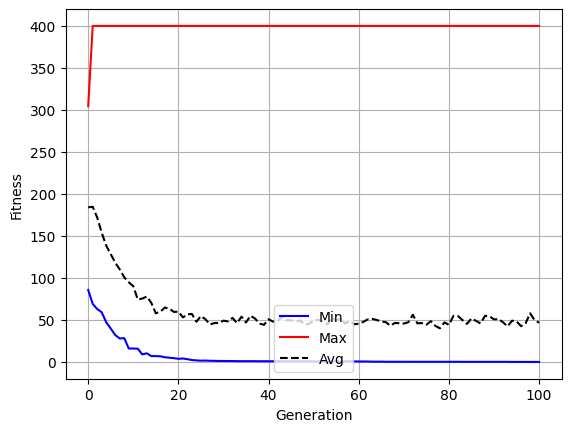

In [11]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

n = 10 # Número de individuos.

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """

    for i in range(len(x)):
     n = len(x)
     if x[i] >  5.12 or x[i] < -5.12:
      return 400,
    n = 10
    A = 10


    C = np.array(x)**2
    D = [0]*len(x)

    for i in range(len(x)):

      D[i] = A*(math.cos(2 * math.pi * np.array(x[i])))


    res = float(A*n + sum(C) - sum(D))

    return res,


toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, n)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 1000)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.8, 0.4, 100 # número de generaciones 100.
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook


best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

El algoritmo genético utilizando el operador de cruce de dos puntos converge hacia un valor de aptitud (fitness) de aproximadamente 0.108923 después de 100 generaciones.

La evolución del fitness también muestra una disminución constante, indicando mejoras en la calidad de las soluciones a lo largo del tiempo.

Al igual que en el Caso 1, el mejor individuo encontrado en este caso tiene un conjunto de variables que produce un valor de función objetivo cercano a cero, cumpliendo con el objetivo de minimización.

#Comparación entre uno o dos puntos de cruce
Ambos casos muestran convergencia y mejoramiento en el fitness a lo largo de las generaciones, lo que sugiere que ambos operadores de cruce son efectivos para este problema.
La elección entre un punto de cruce o dos puntos puede depender de la naturaleza específica del problema y de cómo interactúan las variables. En este caso, ambos operadores parecen ser adecuados.

En resumen, el caso con dos puntos de cruce tiende a introducir más variabilidad y exploración en el espacio de búsqueda, mientras que el caso con un solo punto de cruce tiende a mantener una cierta continuidad y permite una mayor explotación de regiones prometedoras.